<a href="https://colab.research.google.com/github/ahcamachod/1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen muchas dimensiones, lo recomendable es tomar dichos datos y transformarlos de modo que se ajusten a un espacio dimensional menor asegurándonos de que el espacio dimensional resultante mantenga las propiedades que mejor caracterizan a los datos originales, garantizando su dimensión intrínseca.


En este notebook, estaremos aprendiendo varias estrategias para lidiar con la alta dimensionalidad en el modelaje de aprendizaje de máquina.


El dataset empleado en el desarrollo de este proyecto es un dataset ficticio, llamado a ```aluracare.csv```, adaptado a nuestro contexto, tomando como referencia el siguiente dataset:  

*Dataset:* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# 1. Datos con muchas dimensiones

##### *https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [ ]:
# 1°) Importamos Pandas y creamos la Variable para almacenar el archivo del DataSet -->

import pandas as pd

dataset = pd.read_csv("aluracare.csv")
dataset.head()

,id,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,...,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32,examen_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
# 2°) Vemos las Dimensiones del Dataset --->

dataset.shape

# 569 Filas, 35 Columnas.

(569, 35)

In [ ]:
# 3°) Vemos cuantos Tumores son BENIGNOS y MALIGNOS en la columna de Diagnostico --->

dataset.diagnostico.value_counts

<bound method IndexOpsMixin.value_counts of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostico, Length: 569, dtype: object>

In [ ]:
# 4°) Vemos cuantos valores estan NULOS(NAN) --->

dataset.isna().sum()

# Vemos que EXAMEN_33 tiene 419 valores nulos, si tenemos 569 registros, vemos que 569/419=0.7363(73%) de valores Nulos
# y podemos ya pensar en quitar esta columna del DataSet.

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

In [ ]:
# 5°) Tambien quitamos ID, de identificacion del paciente que NO tiene sentido --->
# 6°) Asignamos nuemro a diagnostico en M y B, usamos REPLACE metedo --->

dataset.drop(columns=['id','examen_33'], axis=1, inplace=True)
dataset.diagnostico.replace('M', 1, inplace=True)
dataset.diagnostico.replace('B', 0, inplace=True)
dataset.head() # Vemos como quedo el dataset con los cambios realizados.

,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


***Usamos Modulos:*** SKLEARN.MODEL_SELECTION.TRAIN_TEST_SPLIT - SKLEARN.PREPROCESSING IMPORT STANDARDSCALER.

In [ ]:
# 7°) Usamos los MODULOS --->

# SKLEARN.MODEL_SELECTION.TRAIN_TEST_SPLIT, toma la base de datos y la reparte en una base de Entrenamiento y una base de Prueba:
from sklearn.model_selection import train_test_split

# Luego para unificar los datos y su escala en las variables X, utilizamos el MODULO--> SKLEARN.PREPROCESSING IMPORT STANDARDSCALER:
from sklearn.preprocessing import StandardScaler


In [ ]:
# 8°) Tomamos los EXMANES como valores de referencia (X), excluyendo el diagnostico --->

X = dataset.drop(columns='diagnostico', axis=1)
y = dataset.diagnostico
X_std = StandardScaler().fit_transform(X)# Para unificar la escala de las variables X de entrenamiento.


In [ ]:
# 9°) Luego de tomar los valores de referencia y hacer la division, creamo Entrenamiento y Prueba --->

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state= 42, test_size= 0.3) #Usamos X_std, escala unificada.

# DataSet separado en base de Entrenamiento y Prueba.

***Usamos modulo:*** SKLEARN.LINEAR_MODEL.LOGISTICREGRESSION.

In [ ]:
# 10°) Vamos a hacer nuestra BASELINE, con una REGRESION LOGISTICA, que es un Modelo de clasificacion muy robusta por su simplicidad
# generalizada muy buena ---->

# SKLEARN.LINEAR_MODEL.LOGISTICREGRESSION:
from sklearn.linear_model import LogisticRegression


In [ ]:
# 11°) Instanciamos el MODELO --->

logistic = LogisticRegression(C=100, n_jobs=-1)

# C = Que tan fuerte queremos que sea regularizado, regularizar este MODELO implica darle una EXACTITUD y al hacerlo mas EXACTO
# como el riesgo de perder la regularizacion, entonces a C le ponemos parametros para que sea mas leve la Regularizacion.
# N_JOBS = Para que utilice todo el recurso del CPU, en este caso la del COLAB.

logistic.fit(X_train, y_train)# Para crear el Entrenamiento

# Creamos nuestro Modulo de Regresion Logistica.


LogisticRegression(C=100, n_jobs=-1)

In [ ]:
# 12°) Ahora medimos la EXACTITUD de nuestro Modelo--->

logistic.score(X_test, y_test)

# Nos devuelve un modelo EXACTITUD del 95%

0.9590643274853801

## - Validando nuetra Baseline

Creamos nuestra BASELINE y obtuvimos una EXACTITUD del 95%, pero recordemos que nosotros colocamos nuestro parametro en C=100 en LOGISTIC REGRESSION, pero si yo le coloco un valor grande como 100 voy a regularizar con menos rigurosidad y entonces mi modelo va a generalizar mucho menos.

In [ ]:
# 1°) Instanciamos nuevamente nuestra REGRESION LOGISTICA, con un valor mas padronizado y por defecto este parametro viene con valor
# igual a 1, de esta manera quizas garantizamos un comportamiento de regularizacion mejor ---->

logistic = LogisticRegression(C=1, n_jobs=-1) # Con C=1
logistic.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1)

In [ ]:
# 2°) Ahora vemos nuestro puntaje --->

logistic.score(X_test, y_test)

# Efectivamente mejoro la EXACTITUD de nuestro Modelo.

0.9824561403508771

***Usamos modulo:*** SKLEARN.ENSEMBLE.RANDOMFORESTCLASSIFIER.

In [ ]:
# 3°) Ahora vamos a tratar un Modelo mas complejo, como BOSQUES ALEATORIOS ---->

#SKLEARN.ENSEMBLE.RANDOMFORESTCLASSIFIER:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 4°) Instanciamos el MODELO --->

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 5°) Vemos la EXACTITUD  del Modelo --->

forest.score(X_test, y_test)

# TENGO LA REGRESION LOGISTICA QUE UN MODELO MAS SENCILLO Y REGULARIZA MEJOR QUE NOS DA UNA EXACTITUD DE MAS DEL 98% Y CON UN
# RANDOM FOREST QUE ES UN MODELO MAS COMPLEJO TENGO UNA EXACTITUD DEL 97%, ESNTONCES PODEMOS VALIDAR EN NUESTRA BASELINE QUE UNA
# REGRESION LOGISTICA ES LA MAS ADECUADA BAJO ESTOS PARAMETROS PARA CLASIFICAR MEJOR NUESTRO DIAGNOSTICO.

0.9707602339181286

Definicion: BASELINE

Una buena práctica al iniciar un nuevo proyecto es establecer siempre un punto de partida que sirva como referencia durante el desarrollo del mismo. Este punto de partida se conoce como baseline.

Al crear una baseline en Machine Learning debemos partir con un modelo más sencillo e ir aumentando de manera gradual su complejidad para obtener mejores resultados. Esto permitirá añadir complejidad en la medida que sea necesario y evitar el sobreajuste de los modelos.

# 2. Avanzando y explorando los datos

##### *https://seaborn.pydata.org/introduction.html*
*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

### - Construyendo una Visualizacion

Vamos a usar la biblioteca SEABORN, especificamente la PLOT VIOLIN (grafico), es un PLOT que nos va a permitir la Distribucion de los Resulatados y vamos a identificar el DIAGNOSTICO, si es Positivi (+) cuando el tumor es Maligno o si es Negativos (-) cuando el tumor es Benigno, en el Eje X queremos especificar nuestros EXAMENES y en el Eje Y queremos ver el valor de nuestros Resultados.

In [ ]:
# 1°) Importamos la biblioteca SEABORN y luego MATPLOTLIP para ajustar ciertos parametros del grafico -->

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 2°) Creamos VIOLIN PLOT(grafico), pero antes CONCATENAMOS nuestra columna de DIAGNOSTICO que seria nuestra Y y nuestro
# EXAMENES que serian nuestra X --->

datos = pd.concat([y, X], axis=1)
# Para hacer un nuevo DataFrame utilizamos la Funcion .MELT para que contenga el DIAGNOSTICO en una columna, todos los EXAMENES
# en otra columna y por ultimo los RESULTADOS en otra columna, va a colocar todas las columnas como Filas :
datos = pd.melt(datos, id_vars = "diagnostico", var_name = "examenes", value_name = "resultado")
datos

,diagnostico,examenes,resultado
0,1,examen_1,17.99000
1,1,examen_1,20.57000
2,1,examen_1,19.69000
3,1,examen_1,11.42000
4,1,examen_1,20.29000
...,...,...,...
18203,1,examen_32,0.07115
18204,1,examen_32,0.06637
18205,1,examen_32,0.07820
18206,1,examen_32,0.12400


<Axes: xlabel='examenes', ylabel='resultado'>

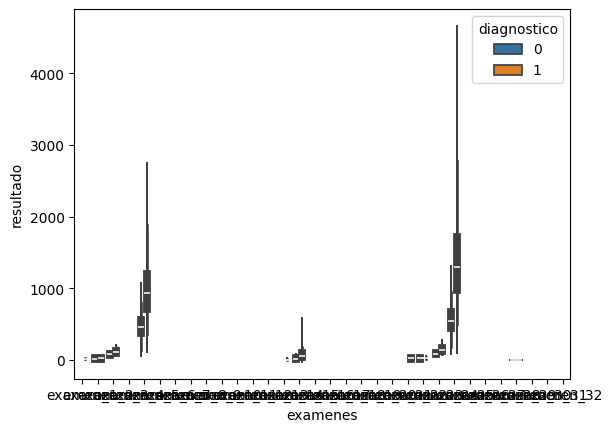

In [ ]:
# Configuramos el grafico --->

sns.violinplot(data = datos, x = "examenes", y = "resultado", hue = "diagnostico") # HUE= lo que queremos visualizar
# Nos devuelve un grafico poco visual!

<Axes: xlabel='examenes', ylabel='resultado'>

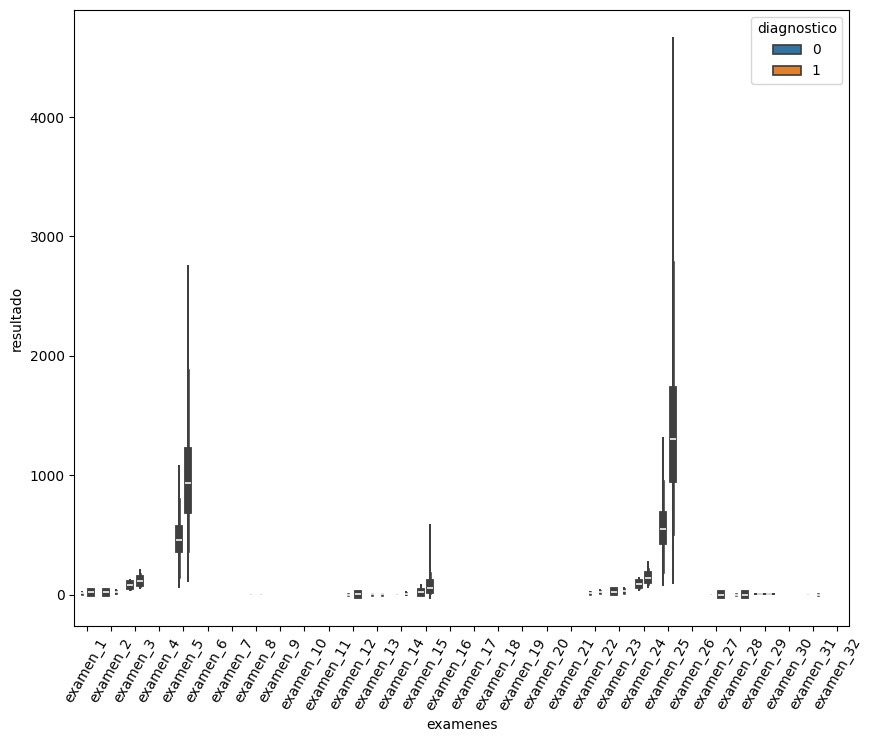

In [ ]:
# Utilizamos la biblioteca MATPLOTLIB para dejar con una mejor visual el grafico --->

plt.figure(figsize = (10,8))
plt.xticks(rotation = 60) # Para rotar 60 grados las palabras Examenes y se lean mejor.
sns.violinplot(data = datos, x = "examenes", y = "resultado", hue = "diagnostico")

# Nos devuelve la grafica , pero de todos modos no logramos una buena Visualizacion!!

## -Mejorando la Visualizacion

No podemos visualizar los RESULTADOS, los RESULTADOS NO estan en el mismo INTERVALO, usaremos la Variable ya Normalizada (X_STD), lo hicimos anteriormente y creamos la Funcion.

In [ ]:
# 3°) Creamos una Variable y tambien creamos un DataFrame con X_STD que habiamos Normzalizado y las columnas van a ser
# las X de nuestro DataFrame, la X antes de la segregacion --->

X1 = pd.DataFrame(X_std, columns = X.keys())
X1.head()

# Nos devuelve los valores en DataFrame ya Normalizados.

,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


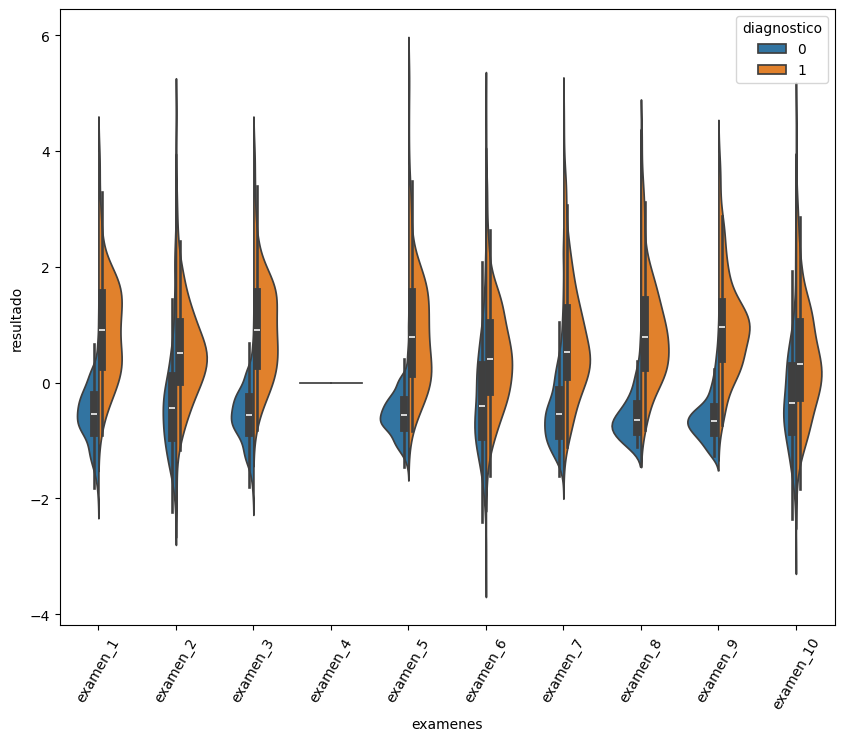

In [ ]:
# 4°) Ahora colocamos todos los codigos del grafico dentro de una FUNCION y el DataFrame datos --->

def violin (inicio, fin):
  datos = pd.concat([y, X1.iloc[:, inicio:fin]], axis=1) # X1 = valores Estandarizados,.ILOC= Para dedirle donde quiero que inicie a graficar y finalice.
  datos = pd.melt(datos, id_vars = "diagnostico", var_name = "examenes", value_name = "resultado")
  plt.figure(figsize = (10,8))
  plt.xticks(rotation = 60)
  sns.violinplot(data = datos, x = "examenes", y = "resultado", hue = "diagnostico", split=True)

violin(0, 10)  # Queremos que inicie en mi COLUMNA 0 y finalice en mi EXAMEN 10

# NOS DEVUELVE UN GRAFICO MAS SENCILLO DE OBSERVAR, PODEMOS VER QUE EN EXAMEN_1 TENEMOS UNA DIISTRIBUCION NORMAL EN O (BENIGNO)
# Y UNA DISTRIBUCION BIMODAL EN 1 (MALIGNO) EN CUANTO AL DIAGNOSTICO DE TUMORES. EN EXAMEN_2, DISTRIBUCION NORMAL EN 0 Y 1, Y ASI
# OBSERVAMOS SUCESIVAMENTE EL RESTO DE LOS EXAMNES.



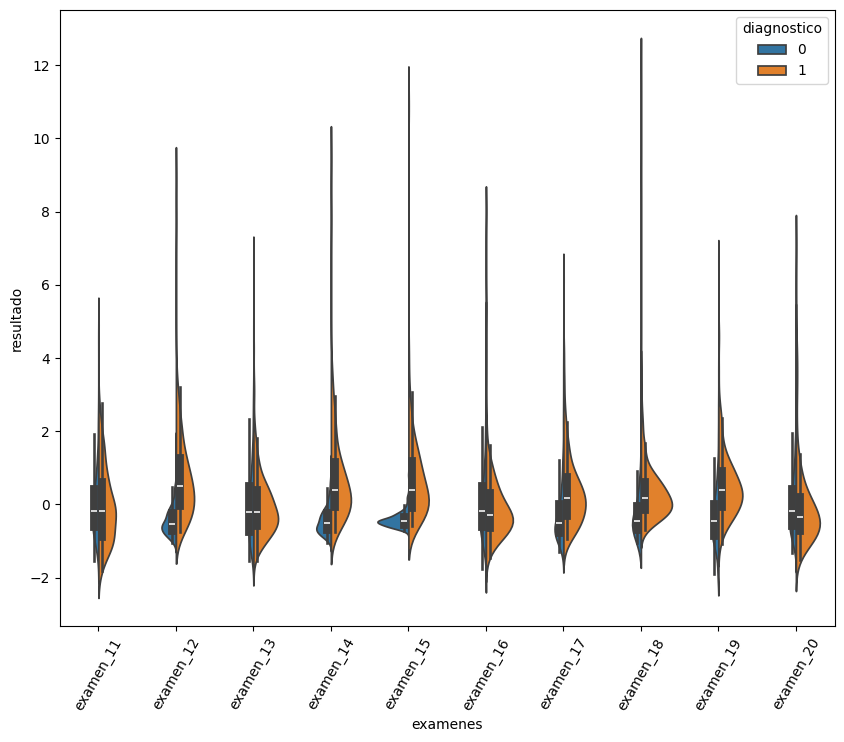

In [ ]:
# 4°) Ahora hacemos VIOLIN PLOT en el resto de los examenes, de 10 a 20 y de 20 a 32 ---Z

violin(10,20)

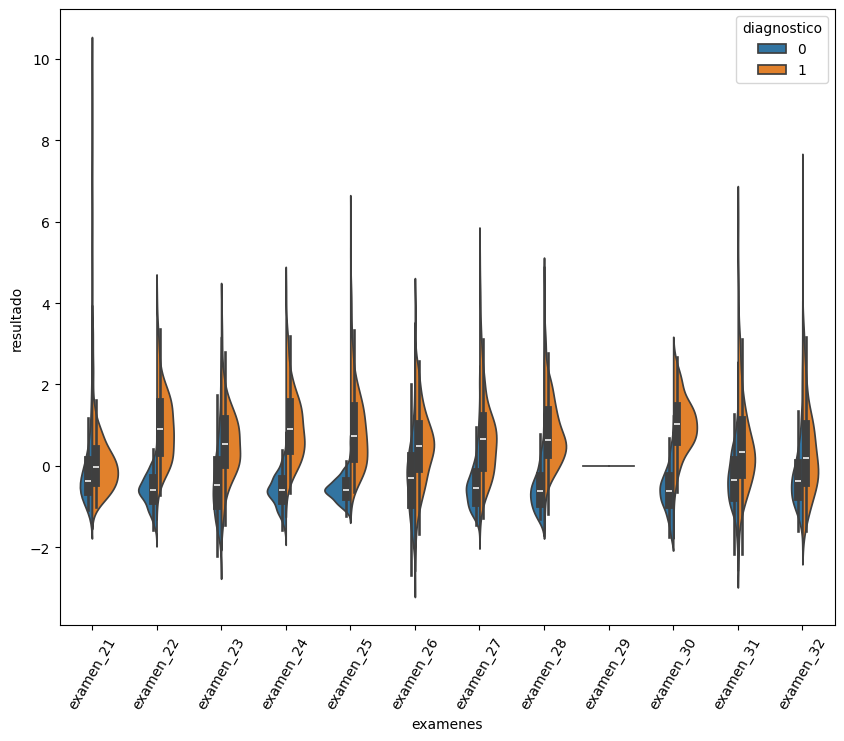

In [ ]:
violin(20, 32)

Definicion:

Cuando graficamos nuestros datos usando la función violinplot() de seaborn debemos tener en cuenta que para comparar los atributos lo ideal es que los mismos se encuentren dentro del mismo intervalo de valores. Para ello utilizamos el módulo StandardScaler de sklearn.preprocessing.

- std = StandardScaler()
X_std = std.fit_transform(X), Esta es una manera de hacerlo.

- X_std = StandardScaler().fit_transform(X), Así también podemos crear nuestros valores normalizados.

## -Trabajando con Valores Constantes

Podemos ver en la grafica de los primeros 10 EXAMENES que EXAMEN_4 NO nos muestra ningun tipo de Distribucion, se observa como un valor CONSTANTE, lo mismo sucede con EXAMEN_29.

In [ ]:
# 5°) Sin nosotrss evaluamos el valor del EXAMEN_29 vemos que tenemos un valor CONSTANTE --->

X1.examen_29

#Valor Constante 1

0      1.110223e-16
1      1.110223e-16
2      1.110223e-16
3      1.110223e-16
4      1.110223e-16
           ...     
564    1.110223e-16
565    1.110223e-16
566    1.110223e-16
567    1.110223e-16
568    1.110223e-16
Name: examen_29, Length: 569, dtype: float64

In [ ]:
# Lo mismo sucede con EXAMEN_4 --->
X1.examen_4

0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: examen_4, Length: 569, dtype: float64

### **- QUE PASA CON LOS VALORES CONSTANTES ??**

Cuando tenemos una VARIABLES CONSTANTE lo podemos pensar como la siguiente situacion : tenemos un grupo de animales y diferentes ATRIBUTOS que me van a permitir identificar que tipo de animal es, porque ejemplo, 0=no, 1=si, vaca(ladra)=0, perro(ladra)=1, gato(ladra)=0, muge..., maulla..., y por ultimo tiene 4 patas(todos)=1, ***el ultimo ATRIBUTO que es 4 PATAS NO nos permite distinguir que animal es, NO brinda informacion adicional de que animal es, por lo tanto podemos eliminar ese Atributo***, los Atributos que nos permiten distiguir que animal es(ladra, muge, maulla)

In [ ]:
# 6°) Entonces viendo el ejemplo de arriba de los valores CONSTANTES, nos conviene remover las 2 columnas de EXAMENES 29 y 4,
# para esto creamos otra variable X2 --->

X2 = X1.drop(columns = ["examen_29", "examen_4"], axis=1)# En la variable X2 creada, llamamos a X1 y le damos drop a las columnas
X2.head(2)

# Nos devuelve un DataFrame donde ya NO estan esos 2 EXAMENES.

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [ ]:
# 7°) Ahora comparamos la EXACTITUD de los modelos de X1(con todos los Examenes) y X2(sin Examen 29 y 4), creamos una Funcion --->

def puntaje(resultados): #Funcion
  X_train, X_test, y_train, y_test = train_test_split(resultados, y, random_state=42, test_size=0.3)
  logistic = LogisticRegression(C=1, n_jobs=-1)
  logistic.fit(X_train, y_train)
  logistic.score(X_test, y_test)
  return f"La Exactitud es {round(logistic.score(X_test, y_test)*100, 2)} %"

print(puntaje(X1))

# NOS DEVUELVE LA EXACTITUD DEL MODELO X1 CON TODAS LAS VARIABLES, COMO LO HABIAMO HECHO MAS ARRIBA, LUEGO LA COMPRAMOS CON X2

La Exactitud es 98.25 %


In [ ]:
# Ahora lo comparamos con la EXACTITUD del modelo X2 que no tiene EXAMENES 29 y 4 --->

print(puntaje(X2))

# NOS DA LA MISMA EXACTITUD A PESAR DE HABER QUITADO EXAMEN_29 Y EXAMEN_4 QUE ERAN LOS QUE TENIAN LAS CONSTANTES EN EL GRAFICO.
# NO HEMOS TENIDO NINGUNA MEJORA CONSIDERABLE, LO QUE PODEMOS OBSERVAR ES QUE ESTAMOS REDUCIENDO ATRIBUTOS Y NO ESTAMOS PERDIENDO EN
# EXACTITUD LO CUAL ES UN BENEFICIO, ES DECIR QUE DE NUESTRA BASE DE DATOS ORIGINAL DE 33 EXAMENES, AL QUITARLE 3 EXAMENES(33=Nulos,
# 29 y 4=Valores Constantes) y quedarnos con 30 EXAMENES, NO SE PIERDE EXACTITUD Y ESTO PUEDE AGILIZAR EL PROCESO.

La Exactitud es 98.25 %


# 3. Datos correlacionados

## -Matriz de Correlacion #1

Es una EXPRESION ESTADISTICA, la cual se mide la relacion que tienen 2 o mas Variables.

In [ ]:
# 1°) Tomamos el ultimo DataFrame que realizamos e invocamos la funcion de pandas de CORRELACION --->

X2.corr()

# Nos devuelve un DataFrame que tiene la CORRELACION entre EXAMEN consigo mismo y los demas, en la diagonal vemos que los valores son 1, ya
# que es la relacion de el mismo(Examen_3 con Examen_3) y tambien nos devuelve como se relacionan por ejemplo Examen_5 con Examen_3(0.986507)
# que es un VALOR ALTO, muy CORRELACIONADO, no es agradable hacerlo visualmente uno por uno cual es la correlacion en la tabla , cuando se tiene
# muchas variables , para esto usaremos una funcion de SEABORN que es el HEATMAP.

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
examen_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
examen_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
examen_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
examen_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
examen_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
examen_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
examen_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
examen_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
examen_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

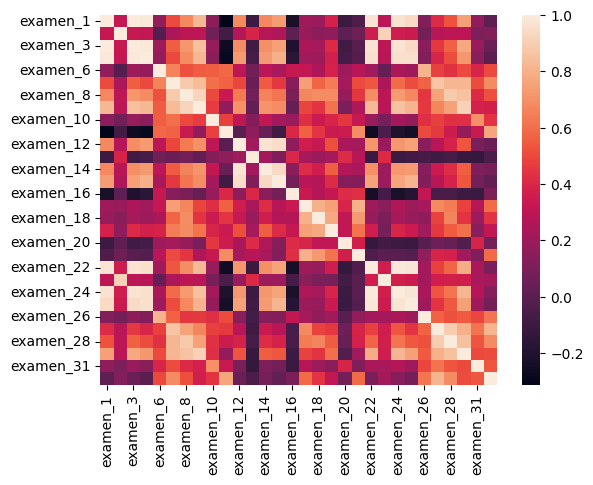

In [ ]:
# 2°) Usamos la funcion HEATMAP para ver la CORRELACION entre las Varibles --->

sns.heatmap(X2.corr())

# Nos devuelve un MAPA DE COLORES, con todos los valores, los colores mas CLAROS indica una ALTA CORRELACION y colores
# OSCUROS hay MENOS CORRELACION.


<Axes: >

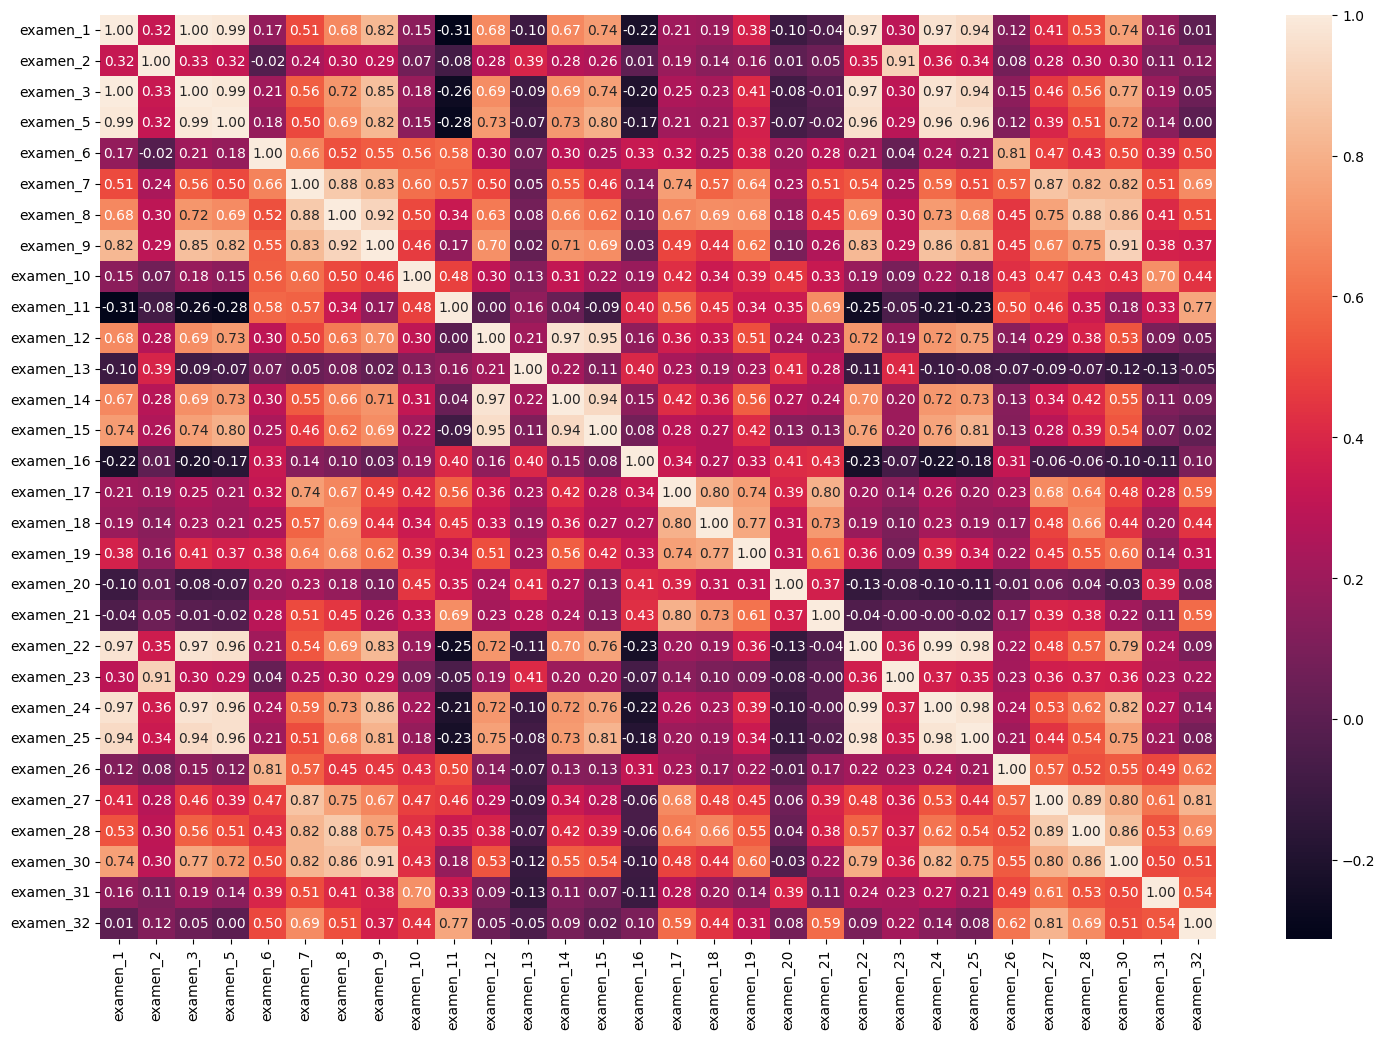

In [ ]:
# 3°) Agrandamos la figura de la grafica para observarla mejor --->

plt.figure(figsize=(18,12)) # Agrandar el HEATMAP
sns.heatmap(X2.corr(), annot=True, fmt = ".2f") # annot=True, Para tener los Valores, ftm= decimales

# Nod devuelve el HEATMAP de la CORRELACION de las Variables Examen, con los valores y tamaño de HEATMAP mas grande.
# Podemos observar datos ALTAMENTE CORRELACIONADOS, como EXAMEN_1 y EXAMEN_3(1.0), EXAMEN_1 y EXAMEN_21(0.97), etc, podemos
# ir pensando en eliminar estos ATRIBUTOS que estan altamente correlacionados, esto quiere decir que tal vez eliminando 1 de
# ellos y manteniendo el otro vamos a poder mantener basicamente el poder de EXACTITUD que queremos, ya que estamos lidiando con
# datos de muchas dimensiones y lo que queremos es reducir las dimensiones.

Definicion:

La matriz de correlación es una herramienta que nos ayuda a visualizar la reciprocidad entre variables independientes. La biblioteca pandas tiene un método llamado corr() que nos ayuda a generar los valores referentes al porcentaje de correlación. De la misma manera, la biblioteca seaborn contiene una función muy interesante para visualizar mejor la matriz de correlación llamado heatmap().

El parámetro annot=True permite que en cada recuadro estén escritos los valores, y fmt='.2f les da un formato numérico de 2 casillas decimales.

## -Matriz de Correlacion #2

In [ ]:
# 1°) Tomamos la tabla de CORRELACION X2 y a traves de una mascara le preguntamos sobre los valores mayores que 0.99%, ALTA CORRELACION --->

alta_corr = X2.corr()[X2.corr() > 0.99]
alta_corr

# Nos devuelve la tabla unicamente con los valores por encima del 0.99 %, el resto aparece como NAN, vemos logicamente que hay EXAMENES
# iguales que tienen Correlacion de 1 y tambien podemos ver el EXAMEN_1 y EXAMEN_3 (0.997855), CORRELACION ALTA, al igual que otros EXAMENES.

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2°) Para facilitar esta visualizacion de los Atributos con mayor CORRELACION, vamos a darle una SUMA, para ver --->

alta_corr.sum()

# Nos devuelve los EXAMENES con valores superiores a 0.99

examen_1     1.997855
examen_2     1.000000
examen_3     1.997855
examen_5     1.000000
examen_6     1.000000
examen_7     1.000000
examen_8     1.000000
examen_9     1.000000
examen_10    1.000000
examen_11    1.000000
examen_12    1.000000
examen_13    1.000000
examen_14    1.000000
examen_15    1.000000
examen_16    1.000000
examen_17    1.000000
examen_18    1.000000
examen_19    1.000000
examen_20    1.000000
examen_21    1.000000
examen_22    1.993708
examen_23    1.000000
examen_24    1.993708
examen_25    1.000000
examen_26    1.000000
examen_27    1.000000
examen_28    1.000000
examen_30    1.000000
examen_31    1.000000
examen_32    1.000000
dtype: float64

In [ ]:
# 3°) Ahora lo que hacemos es elegir uno de esos EXAMENES y eliminar el otro, para NO mantener 2 Atributos que me brindan la misma informacion,
# NO queremos duplicidad de informacion que NO nos aporta, creamos una nueva Variable --->

X3 = X2.drop(columns = ["examen_3", "examen_24"]) # Dejamos examen_1 y borramos el 3, dejamos examen_22 y borramos el 24
X3.head()

# Nos devuelve la tabla sin el examen_3 y examen_24

,examen_1,examen_2,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,...,examen_21,examen_22,examen_23,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Despues de haber realizado esta modificacion de la CORRELACION entre variables, vamos a ver como se comporta la FUNCION que
# creamos PUNTAJE, para ver la EXACTITUD --->

puntaje(X3)

# Vemos que se mantuvo la EXACTITUD del 98.25 % como en X1 y X2, ni se le ha agregado , ni se le ha quitado EXACTITUD, los cual ex
# BUENO, lo que queremos es reducir las dimensiones minimizando la perdida de EXACTITUD.

'La Exactitud es 98.25 %'

## -Correlacion y Causalidad

Ver pagina de SPURIOUS CORRELATIONS (correlaciones falsas) , NO son legitimas, observamos una serie de correlaciones que NO tienen sentido, hay que tener cuidado cuando sacamos una conclusion entre VARIABLES ALTAMENTE CORRELACIONADAS, quizas infiriendo que una es CAUSAL de la otra. Son las CORRELACIONES que son absurdas, que NO tienen sentido, las que nos permiten tener en cuenta que NO siempre cuando estamos eliminando una Variable que ela sea causal de la otra. En nuestros ejercicios de CORRELACION utilizamos un criterio para eliminar 1 de las 2, pero NO quiere decir que una sea menos importante que la otra, estamos simplemente reduciendo las dimensiones, la ALTA DIMENSIONALIDAD.

Definicion:

La correlación nos permite medir el nivel de reciprocidad entre nuestras variables. Cuando hay una alta correlación entre dos atributos podemos concluir que: La mejor opción para nuestro modelo de clasificación es retener uno de ellos y eliminar el otro. Así obtendremos mejores resultados.


# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

## -SelectKBest

Vamos a automatizar la seleccion de los datos, para esto usaremos Modulos, en este caso el Modulo que comenzaremos a usar es SELECTKBEST que se encarga de seleccionar los Atributos con los mejores puntajes con K= N° DE ATRIBUTOS y necesita 2 parametros, una Funcion que va a puntuar y K que es los n° de Atributos que queremos.

In [ ]:
# 1°) Importamos SELECTKBEST--->

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # Importamos tambien CHI2 que lo vamos a usar abajo tambien

In [ ]:
# 2°) Instanciamos el Modulo --->

kbest = SelectKBest(score_func=chi2, k=5)

# KBEST= Variable, CHI2= es un test o prueba estadistica que mide la Aleatoridad de las Variables, si una Variable es producto de la
# Aleatoridad a traves de este test lo de determinaremos, la funcion lo que va hacer es eliminarla de nuestro Atribustos, CHI2 NO TRABAJA
# CON VALORES NEGATIVOS

In [ ]:
# 3°) Creamos la Variable, la tabla donde estamos aplicando KBEST, pero antes debemos crear una Variable para que podamos hacer CHI2 y NO
# tengamos valores Negativos, asi CHI2 puede sr utilizado, estos valores negativos fueron creados cuando Normalizamos los valores X (X_STD) --->

X4 = X.drop(columns=["examen_3", "examen_4", "examen_24", "examen_29"], axis=1)

# Eliminamos en X4 las columnas que habiamos eliminado anetriormente en las demas variables creadas, examen 29 y 4(valores constantes eliminados)
# examen 3 y 24(valores correlacionados entre si eliminados), ademas hicimos un DROP a la X del DATASET ORIGINAL, ya no tendremos  los valores de
# la X NORMALIZADA


In [ ]:
# 4°) Luego creamos base de ENTRENAMIENTO y PRUEBA --->

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)

In [ ]:
# 5°) Hacemos un FIT() a nuestro KBEST --->

kbest.fit(X_train, y_train) # Entrenamos nuestro KBEST

SelectKBest(k=5, score_func=<function chi2 at 0x78f5b63388b0>)

In [ ]:
# 6°) Creamos la Variable de ENTRENAMINETO de KBEST --->

kbest_train = kbest.transform(X_train)
kbest_test = kbest.transform(X_test)
logistic = LogisticRegression() # Intanciamos nuestr Regresion Logistica
logistic.fit(kbest_train, y_train)

# Lo que hicimos fue crear nuestro Modelo de seleccion de Atributos con KBEST y despues Instanciamos con nuestro clasificador que es la
# Rgresion Logistica.

LogisticRegression()

In [ ]:
# 7°) Vamos a ver el PUNTAJE --->

print(f"La Exactitud utilizando SelectKBest es: {round(logistic.score(kbest_test, y_test)*100, 2)}%")

# Bajo un poco la EXACTITUD, pero recordemos que utilizamos 5 ATRIBUTOS(K=5), pero debemos entender que medir la Exactitud por
# si sola puede NO ser una Metrica lo suficientemente efectiva.

La Exactitud utilizando SelectKBest es: 96.49%


Definicion:

El algoritmo SelectKBest genera una puntuación para cada atributo y selecciona un número k de atributos con los mejores puntajes.

## -Matriz de Confusion

Importamos el paquete **sklearn.metrics.plot_confusion_matrix**(DESAFECTADA), que nos dibuja directamente la matriz de CONFUSION, nos dice donde estan los valores reales, el valor Predicho y nos facilita el desarrollo del tema.

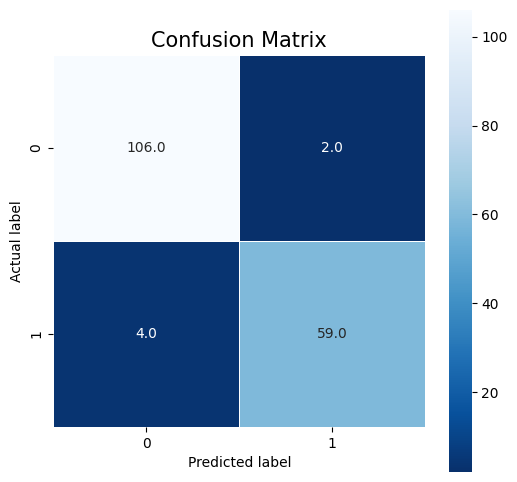

In [ ]:
# prompt: dibujar plot de matrix de confusion (AI)

import sklearn.metrics as metrics

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, logistic.predict(kbest_test))

# Create a plot using matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')

# Labels, title and ticks
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.show()

# CODIGOS DE CUADERNILLO Y COLAB NO COINCIDEN YA QUE LA FUNCION PLOT_CONFUSION_MATRX DE SKLEARN FUE DESAFECTADA, USAMOS AI
# PARA GENERAR EL PLOT DE CONFUSION.


- Es una matriz de 2x2, cada uno de los cuadrados me indica algo, en el **EJE Y** (valores reales de acuerdo con la base de datos), 0 = Tumor BENIGNO, 1 = Tumor MALIGNO, en el **EJE X** (valor Predichos, lo que me modulo PREDIJO).

- En lo valores **REALES (Actual Lebel)** para tumor Benigno (0) hay un total de 108 casos y hay un total de 63 casos en los cuales el tumor es Maligno (1).

- En mi modelo **PREDICT LEBEL** en 106 de esos casos el dijo verdaderamente es un tumor Benigno, aunque hubo 2 casos que nos dice que es un tumor Maligno, pero realmente era un tumor Benigno segun Actual Lebel que esos 2 pertenecen a  0=Beningno(108), esto se conoce como caso de **ERROR TIPO 1**.

- En **valores REALES (Actual Lebel**) tambien hubo casos que el tumor era Maligno realmente y me dice que 59 de ellos de 63 casos me dijo que si que el tumor era Maligno, pero hubo 4 casos de los cuales mi modelo **PREDICT LEBEL** dijo en un tumor Benigno, pero realmente era un tumor maligno, esto se lo conoces como **ERROR TIPO 2 (son Falsos Negativos)**.

- En el caso de salud el ERROR que queremos reducir es el falso negativo, ya que NO le queremos decir a una persona que es un Tumor Benigno cuando en realidad es Maligno.



In [ ]:
# 2°) Vamos a ver los siguientes PUNTAJES, vamos a importar PRECISION, RECALL, F1 Y ACCURACY --->

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# 3°) Creamos una Funcion en la cual estaremos probando nuestros ESTIMADORES o de los MODELOS de SELECCION de ATRIBUTOS --->

def seleccion ( train, test):
  model = logistic.fit(train, y_train)# Instanciamos nuestro Modelo que seria la RegresionLogistica y en ella colocamos base de Entren. y diag. de Entren.
  a = f"La tasa de Acierto es: {round(recall_score(y_test, model.predict(test))*100, 2)}%" # Puntajes
  b = f"La Precision es: {round(precision_score(y_test, model.predict(test))*100, 2)}%" # Puntajes
  c = f"El valor F es: {round(f1_score(y_test, model.predict(test))*100, 2)}%" # Puntajes
  d = f"La Exactitud es: {round(accuracy_score(y_test, model.predict(test))*100, 2)}%" # Puntajes
  return f"{a}, {b}, {c}, {d}"

seleccion(kbest_train, kbest_test) # Llamamos la Funcion

# Acierto: Nuestra sensibilidad en la cual capturamos los casos Reales fue de 93.65
# Precision: De nuestro modelo fue 96.72
# F: 95.16
# Exactitud: 94.49

# ERROR TIPO 1(PRECISION), nuestro SELECTKBEST se enfoco mas en disminuir este ERROR y nosotros lo que queremos es disminuir es el
# ERROR TIPO 2(ACIERTO), queremos en cuales casos el tumor es MALIGNO verdaderamante, es decir, NO decir que es BENIGNO y en realidad
# es MALIGNO


'La tasa de Acierto es: 93.65%, La Precision es: 96.72%, El valor F es: 95.16%, La Exactitud es: 96.49%'

Definicion:

Cuando empleamos la matriz de confusión, nos encontramos ante una poderosa herramienta para medir la sensibilidad, la precisión, el valor F y la exactitud.
Cuando hablamos sobre el ERROR TIPO 1 en la matriz de confusión esto significa que:

Nuestro modelo presenta falsos positivos, es decir, predijo un valor real en su output cuando el input no lo era.

## -Seleccion con RFE

**RFE**: Se encarga de medir la EXACTITUD a todos los Atributos y les da un Puntaje, luego empieza a Eliminar al que tiene menos puntaje, los atributos restantes algunos van aumentar de valor y otros van a seguir disminuyendo. Luego vuelve a asignar puntaje y vuelve a eliminar el atributo que no aporta gran volumen numerico, y asi susecivamente hasta dejar los atributos que contengan mas informacion de acuerdo a lo que yo le especifique al Algoritmo RFE.



In [ ]:
# 1°) Vamos a importar la biblioteca SKLEARN.FEATURES_SELECTION.RFE, nos pide como parametros un ESTIMADOR= estiamdor del modelo que
# estamos trabajando que la Regrecion Logistica) , N_FEATURES_TO_SELECT= n° de Atributos que vamos a seleccionar, STEP= n° de Atributos
# que vamos a remover cada vez que RFE asigne un puntaje a esos atributos mientra vaya itereando --->

from sklearn.feature_selection import RFE

In [ ]:
# 2°) Agregamos la base de Entrenamineto y Prueba, usamos la base de datos con los valores Normalizados (X3) --->

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

In [ ]:
# 3°) Instanciamos la Regresion Logistica y Entrenamos el modelo FIT() --->

logistic= LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 4°) Instanciamos nuestro RFE y damos un FIT() --->

rfe = RFE(estimator = logistic, n_features_to_select = 5, step = 1) # Parametro de RFE, 5=Atributos, STEP= n° de Atributos que elimina en cada Iteracion
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
# 5°) Ahora hacemos el TRANSFORM(), # prompt: que es .transform en RFE??, The `.transform()` method in RFE is used to transform the data by selecting the specified number of features.
# It takes the input data and returns a new dataset with the selected features. The selection of features is based on the ranking of features by
# the RFE algorithm.--->

rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)


In [ ]:
# Ahora vemos el SCORE, usamos la Funcion creada mas arriba de SELECCION --->

seleccion(rfe_train, rfe_test)

# Hubo un Aumento en la sensibilidad de nuestro Algortimo RFE, comparado con KBEST que fue un poco mas bajo.

'La tasa de Acierto es: 96.83%, La Precision es: 95.31%, El valor F es: 96.06%, La Exactitud es: 97.08%'

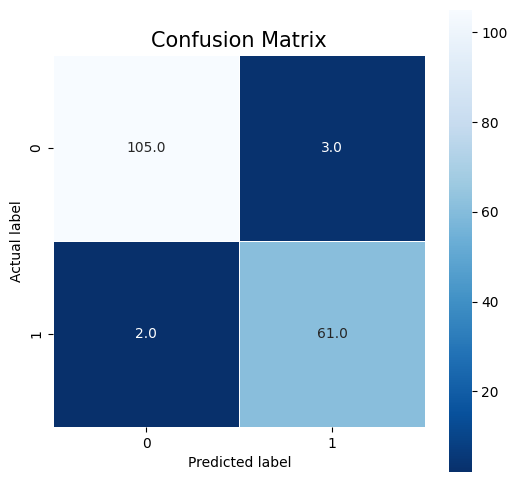

In [ ]:
# 7°) Hacemos el PLOT de la matriZ de CONFUSION de RFE --->
# prompt: dibujar plot de matrix de confusion (AI)

import sklearn.metrics as metrics

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, logistic.predict(rfe_test))

# Create a plot using matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')

# Labels, title and ticks
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.show()

# CODIGOS DE CUADERNILLO Y COLAB NO COINCIDEN YA QUE LA FUNCION PLOT_CONFUSION_MATRX DE SKLEARN FUE DESAFECTADA, USAMOS AI
# PARA GENERAR EL PLOT DE CONFUSION.

# NOS DICE QUE LA MATRIZ DE CONFUSION ESTA VEZ LOGOR IDENTIFICAR 61 CASOS EN DONDE EL TUMOR ES MALIGNO Y CON KBEST FUE DE 59, VEMOS
# UNA MEJORA EN EL ACIERTO , Y ESO ES MUY POSITIVOS!!!


In [ ]:
# 8°) Vemos los Atributos que me preducen los resultados del RFE --->

rfe.support_

# Nos devuelve una mascara de los nombres de los Atributos

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [ ]:
# Para ver los nombres de los ATRIBUTOS --->

X3.columns[rfe.support_]

# Nos devuelve los nombres de los 5 ATRIBUTOS que RFE uso para ver que atributo tiene mas puntaje y nos da mayor informacion!

Index(['examen_12', 'examen_22', 'examen_23', 'examen_25', 'examen_30'], dtype='object')

Definicion:

Automático vs. analítico.

Hemos hablado sobre la selección de features (atributos), esto es, cómo implementarla y utilizarla en el proceso de reducción del número de dimensiones de una cierta base de datos.

¿Cuáles son las diferencias entre los métodos automáticos (SelectKBest y REF) y los analíticos (Detección de valores incompletos, valores constantes y correlacionados) utilizados hasta el momento?


- **El método automático** necesita del número de atributos que serán mantenidos y depende de alguna forma de evaluación para cada atributo, por ejemplo: SelectKBest utiliza una función para generar una puntuación de los atributos, así seleccionando los k mejores.

- **Los métodos analíticos** identifican ciertos aspectos en los datos como la correlación entre los atributos, valores constantes y valores vacíos, para entonces tratar manualmente los respectivos atributos.



# 5. Visualizando los datos en el plano

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*

## -Seleccion con RFECV

Eliminacion de Atributos por RECURSION, utilizando VALIDACION CRUZADA, el Algoritmo lo que hace es dividir nuestra base de datos en diferentes bloques, se aplica RFECV que determina cuantos son y cuales son los Atributos que necesitan para generar el mejor resultado con VALIDACION CRUZADA.

In [ ]:
# 1°) Copiamos codigo que utiizamos en RFE ya que es parecido y modificamos algunas lineas --->

from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

logistic= LogisticRegression()
logistic.fit(X_train, y_train)

rfecv = RFECV(estimator = logistic, cv= 5, step = 1, scoring="accuracy")
rfecv.fit(X_train, y_train)

rfecv_train = rfecv.transform(X_train)
rfecv_test = rfecv.transform(X_test)

seleccion(rfecv_train, rfecv_test)

# Mejora los porcentajes de haciendo RFECV con Validacion Cruzada.

'La tasa de Acierto es: 98.41%, La Precision es: 96.88%, El valor F es: 97.64%, La Exactitud es: 98.25%'

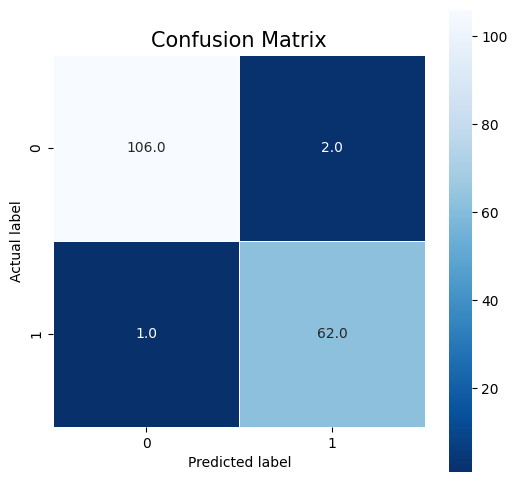

In [ ]:
# 2°) Dibujamos la matriz de Confusion de RFECV --->

import sklearn.metrics as metrics

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, logistic.predict(rfecv_test))

# Create a plot using matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')

# Labels, title and ticks
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.show()

# Mejoramos muchísimo nuestra tasa de acierto, porque de 63 casos en los cuales el tumor era maligno, únicamente 1 de los casos dijo que era benigno,
# pero realmente era maligno, o sea, hubo un falso negativo.

In [ ]:
# 3°) Veamos cuales fueron los FEATURES(Atributos) que el selecciono --->

rfecv.support_ # Mascara

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [ ]:
# Colocamos la Mascara dentro de X3, para ver cuales son --->

X3.columns[rfecv.support_]

# Selecciono todos estos FEATURES.

Index(['examen_1', 'examen_2', 'examen_5', 'examen_7', 'examen_8', 'examen_9',
       'examen_10', 'examen_12', 'examen_13', 'examen_14', 'examen_15',
       'examen_17', 'examen_19', 'examen_20', 'examen_21', 'examen_22',
       'examen_23', 'examen_25', 'examen_26', 'examen_28', 'examen_30',
       'examen_31'],
      dtype='object')

In [ ]:
# 4°) Veamos cuantos FEATURES NO uso --->

len(X3.columns[rfecv.support_])

# De 28 uitilizo 22 Atributos(Examenes)

# Siguen siendo 22 atributos, lo que podemos hacer aquí es tratar de seleccionar los dos mejores atributos, quedémonos con RFE porque a pesar de que RFECV
# nos dio un resultado tan interesante, RFE nos brinda un resultado mejor.

22

Definicion:

RFECV realiza una segregación a la base de datos de acuerdo con un número específico de bloques y aplica la eliminación de atributos por recursión a cada uno de ellos, manteniendo siempre los atributos con los valores de puntaje más altos.

## -Visualizando los datos en el plano.

Vamos a visualizar como el RFECV hace para obtener los 22 ATRIBUTOS(Features), de que manera realizao la seleccion. Cada vez que el hace una VALIDACION CRUZADA genera una Puntuacion.

In [ ]:
# 1°) Vamos a ver los resultados que el va obteniendo cada vez que va seleccionando los mejores Atributos y nos devuelve los valores --->

# CODIGO DE CUADERNILLO NO FUNCIONA, USE A, Y COMPARE CON RESULTADOS DEL AULA
print(rfecv.cv_results_['mean_test_score'])

# En la Primer Validacion Cruzada el genera un resultado, en la Segundo genera una resultado mejor y asi sucesivamente.

[0.91199367 0.92705696 0.9396519  0.94718354 0.95968354 0.96477848
 0.95977848 0.95977848 0.96227848 0.96481013 0.96731013 0.96724684
 0.96724684 0.96724684 0.96974684 0.96724684 0.96724684 0.96724684
 0.96977848 0.97481013 0.97477848 0.97731013 0.97731013 0.97731013
 0.97481013 0.97481013 0.97481013 0.97481013]


<function matplotlib.pyplot.show(close=None, block=None)>

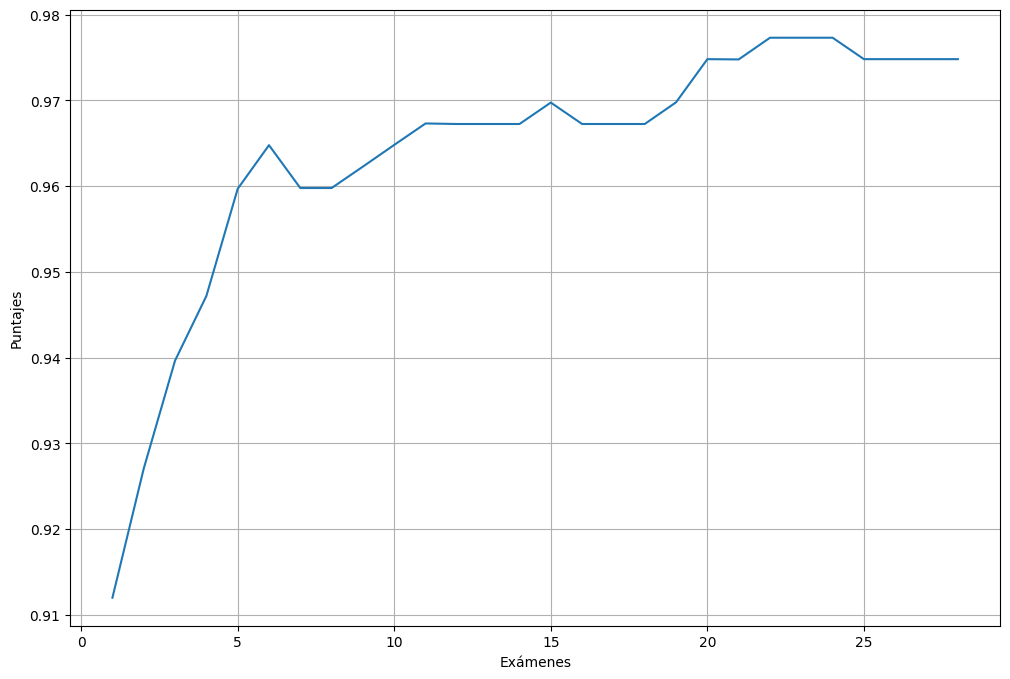

In [ ]:
# 2°) Ahora lo graficamos ---->

# CODIGO DE CUADRENILLO NO EXISTE, USE A, Y COMPARE CON RESULTADOS DEL AULA
plt.figure(figsize=(12,8))
plt.grid() # Que nos genere las lineas de los cuadrados del grafico.
plt.plot(range(1,len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
# Range para tener en cuenta nuestros Rangos de examenes, que comiencen en 1 hasta la longitud de cv_results_, plotaeamo nuestro cv_results_.
plt.xlabel('Exámenes')
plt.ylabel('Puntajes')
plt.show

# El va generando los PUNTAJES y sabe que con 5 atributos el llega a un 96% de EXACTITUD y asi sucesivamante con los demas Atributos
# pero llega al mayor PUNTAJE con la cantidad de 22 Atributos como muestra el PLOT y por esos selecciona 22.

In [ ]:
# 3°) Ahora queremos saber cuales de ellos son los mejores ATRIBUTOS, vamos a seleccionar 2 de ellos con RFE, copiamos codigo de mas arriba
# de RFE y modificamos numeros de atributos --->

from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

logistic= LogisticRegression()
logistic.fit(X_train, y_train)

rfe = RFE(estimator = logistic, n_features_to_select = 2, step = 1) # 2 ATRIBUTOS con RFE
rfe.fit(X_train, y_train)

rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

# Unicamente con 2 ATRIBUTOS(Fatures) obtenemos una tasa de ACIERTO del 95%, de 32 examenes solo con 2 de ellos podemos
# diagnosticar si el tumor es Maligno o Benigno.

'La tasa de Acierto es: 95.24%, La Precision es: 95.24%, El valor F es: 95.24%, La Exactitud es: 96.49%'

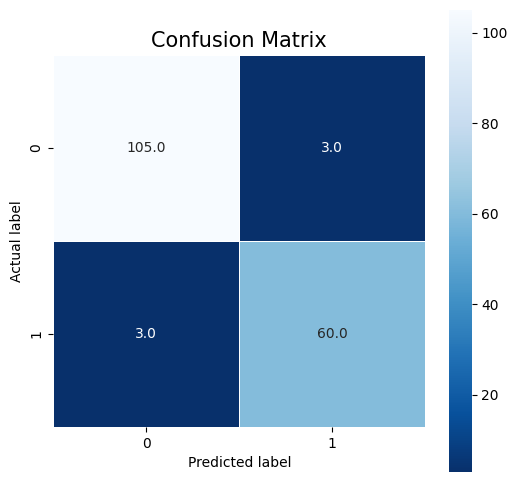

In [ ]:
# 4°) Generamos la Matris de Confusion con RFE y sun 2 Atributos --->

import sklearn.metrics as metrics

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, logistic.predict(rfe_test))

# Create a plot using matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r')

# Labels, title and ticks
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the plot
plt.show()

# Predijo 60 de 63 casos en los cuales hay un Tumor Maligno, es importante que con tan solo 2 Atrubutos llegamos a un resultado tan Exacto o tan Acertado.


In [ ]:
# 5°) Vemos cuales son los 2 Atributos que selecciona RFE --->

rfe.support_ # mascara

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False])

In [ ]:
X3.columns[rfe.support_]

# Nos devuelve que utilizo EXAMEN 25 Y EXAMEN 30.

Index(['examen_25', 'examen_30'], dtype='object')

In [ ]:
# 6°) Creamos una nueva tabla X5 en la cual estaremos almacenando estas 2 Columnas --->

X5 = X3[['examen_25', 'examen_30']] # Creamos X5 y tomamos de X3 los 2 examenes
X5.head()

,examen_25,examen_30
0,2.001237,2.296076
1,1.890489,1.087084
2,1.456285,1.955000
3,-0.550021,2.175786
4,1.220724,0.729259


<Axes: xlabel='examen_25', ylabel='examen_30'>

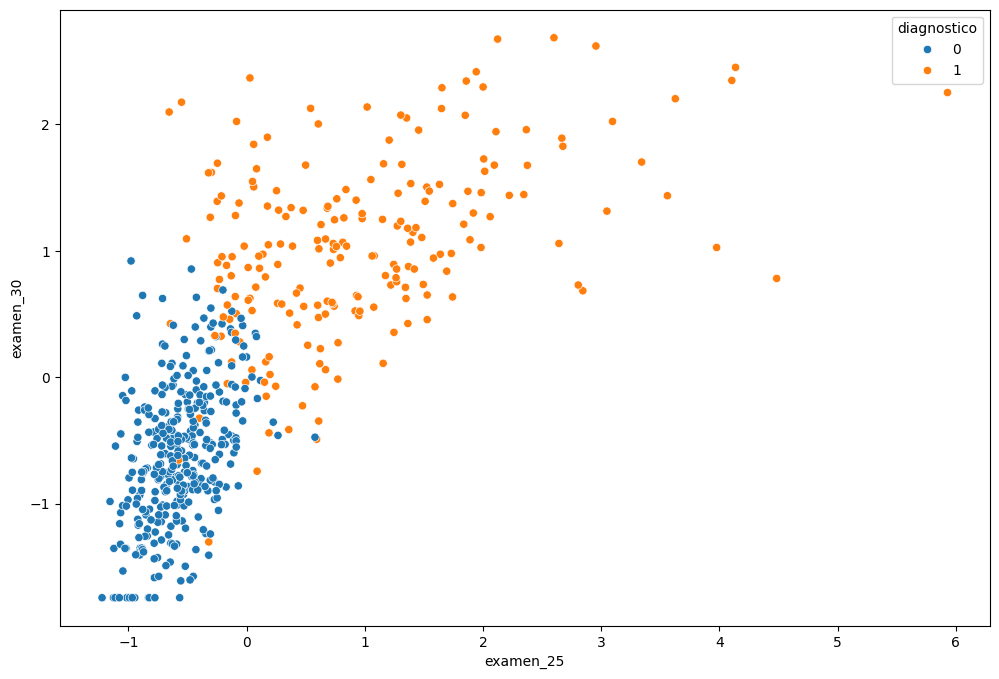

In [ ]:
# 7°) Graficamos la tabla X5 con los valores de los examenes -->

plt.figure(figsize=(12,8))
sns.scatterplot(x=X5.iloc[:,0], y=X5.iloc[:,1], hue= dataset.diagnostico) # [:,0], [:,1]= todas nuestras lineas referentes a la columna 0 referente a la colimna 1
# hue=referente al nuestro dataset y diagnostico.

# Podemos observar mas o menos , a pesar de que hay muchos puntos superpuestos, cuando el tumor es Benigno y cuando el tumor es Maligno.

Deefinicion:

- **Técnicas para la visualización de datos con alta dimensionalidad:**


*Hemos aprendido a generar visualizaciones de datos con alta dimensionalidad en un plano y las principales características de cada método.
Con esto en mente, ¿¿¿Por qué utilizar los métodos de selección de features, como SelectKBest y RFE, para generar una visualización de los datos en el plano es INADECUADA ???  --->*

- Al utilizar las técnicas de selección de features para generar una visualización en el plano, es preciso escoger dos de los atributos para representar los dados. Mantener apenas dos de los diversos atributos, hace que una gran cantidad de información se pierda, resultando en visualizaciones que puedan inducir a conclusiones equivocadas.

- Para generar una visualización en el plano, lo ideal es utilizar técnicas que procuren mantener la mayor cantidad posible de información en una dimensión reducida, como PCA y T-SNE.

## -PCA y TSNE

Hablaremos un poco mas de metodos de REDUCCION DE DIMENSIONALIDAD mas avanzados como PSA y TSNE.



- **PCA (Principal Component Analysis) Analisis de los componenetes principales.**

-Es un metodo de REDUCCION DE ALTA DIMENSIONALIDAD que transforma un grupo grande de Variables en uno mas pequeño tratando de mantener la mayoria de la informacion de los datos (Exactutud vs Simplicidad). PSA esta dispuesto a sacrificar Exactitud pero a ganar tambien en Simplicidad.

-Crea nuevas Variables a partir de Combinaciones Lineales de las Variables Iniciales, realiza unsa serie de operaciones matematicas a esa Variables Iniciales para generar variables nuevas.

-Coloca la mayor cantidad posible de informacion en la primera Variable nueva y entonces vamos a ver como una CURVA, si nosotros graficamos cada una de ellas vamos a ver que PCA en la PRIMER COMPONENTE tiene casi toda la informacion y de ahi en adelante menos informacion. Entonces eso es de forma muy resumida lo que hace PSA.

-Vemos el paquete SKLEARN.DESCOMPOSITION.PCA, tiene  varios parametros pero nos enfocaremos en n_components.

In [ ]:
# 1°) Importamos el modulo PCA --->

from sklearn.decomposition import PCA

In [ ]:
# 2°) Instanciamos PCA--->

pca = PCA(n_components=2) # numero de componentes igual a 2

In [ ]:
# 3°) Creamos una nueva Variable X6, donde estaremos almacenando nuestro Array luego de realizar el FIT_TRANSFORM a PCA --->

X6 = pca.fit_transform(X3) #Fit transfrom a X3 que son nuestro componenetes ya Normalizados.

<Axes: >

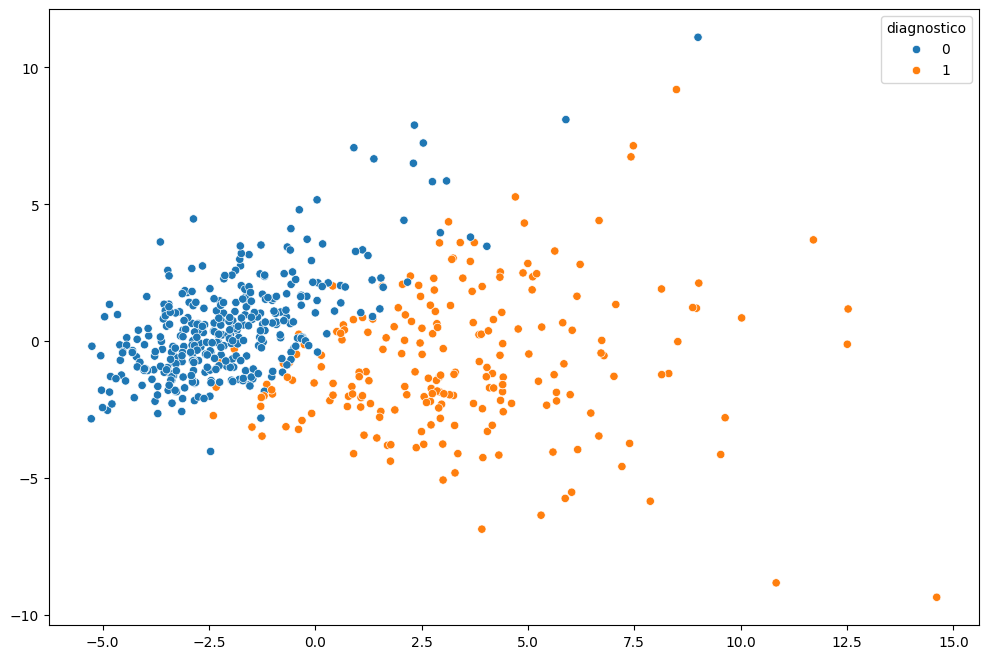

In [ ]:
# 4°) Luego PLOTEAMOS(dibujamos), pero como se trata de un Array NO utilizaremos el metodo ILOC, ya que no lo permite --->

plt.figure(figsize=(12,8))
sns.scatterplot(x=X6[:,0], y=X6[:,1], hue=dataset.diagnostico)

# Nos grafica datos en 2 Dimensiones, va a seleccionar 2 Componentes principales, en nuestro s diagnostico de nuestros tumores
# Malignos y Benignos podemos ver el el grafico que entre los puntos podemos dibujar una RECTA que los divide, entonces el PCAS si nos
# ayuda a diferenciar de cierta manera nuestro PUNTOS.

In [ ]:
# 5°) Queremos saber cual es la informacion, la cantidad y que yo estoy conservando y sacrificando casi todos mis ATRIBUTOS y llegando
# unicamente a 2 Componentes Principales --->

pca.explained_variance_ratio_ # Radio de Varianza Explicado.

# Nos devuelve un Array con proporciones, el primer Componente tiene un 42% (0.42711576) de informacion y el segunco Componente
# tiene un 18% (0.18232762) de la informacion.

array([0.42711576, 0.18232762])

In [ ]:
# 6°) Si le damos un .SUM() --->

pca.explained_variance_ratio_.sum()

# Nos muestra que los 2 COMPONENTES no trae casi el 60% (0.6094433796711519) de la informacion, lo que quiere decir que se ha perdido MUCHA
# INFORMACION reduciendo nuestro dataset a 2 Compnenetes Principales a traves de PCA, NO es muy positivo!

0.6094433796711519

- **TSNE (t- Distributed Stochastic Neighbor Embedding).**

-Lo que hace es REDUCIR LA DIMENSIONALIDAD NO LINEAL (Separa los datos que NO pueden ser separados a traves de ninguna recta), es decir, si nosotros estamos hablando de 28 dimensiones, el lugar donde se encuentran ubicados son en 28 puntos.

-Mide la distancia entre los puntos en ALTAS DIMENSIONES y genera una proporsion de estas distancias en 2 Dimensiones.

-Tiene un ALTO COSTO COMPUTACIONAL, ya que es un Algoritmo mucho mas complejo, pero tambien permite una visualizacion mucho mejor.

-Vemos el paquete **SKLEARN.MANIFOLD.TSNE**, tiene varios parametros, nos enfocaremos en n_components.

In [ ]:
# 1° Importamos el modulo --->

from sklearn.manifold import TSNE

In [ ]:
# 2°) Instanciamos TSNE, con cada ejecucion va a mostrar un resultado diferente, se puede si se quiere utilizar random_state --->

tsne = TSNE(n_components=2)

In [ ]:
# 3°) Creamos una Variable nueva que  va a guardar nuestro Array con las proporsiones --->

X7 = tsne.fit_transform(X3)

<Axes: >

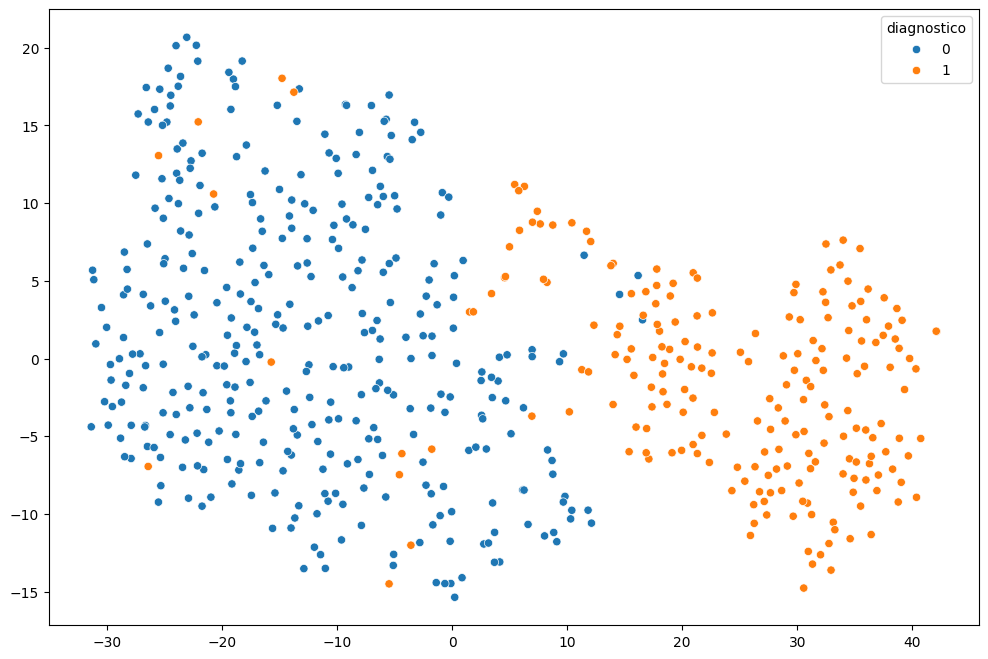

In [ ]:
# 4°) Lo graficamos --->

plt.figure(figsize=(12,8))
sns.scatterplot(x=X7[:,0], y=X7[:,1], hue=dataset.diagnostico)

# Nos muestra que los Puntos se encuentran dispersos, es una forma mas sencilla de ver donde estan concentrados esos
# Puntos de los tumores Benignos y Malignos.